# **Iris Flower Classification: A Comprehensive Comparison of Multiple Models with Confidence Prediction**


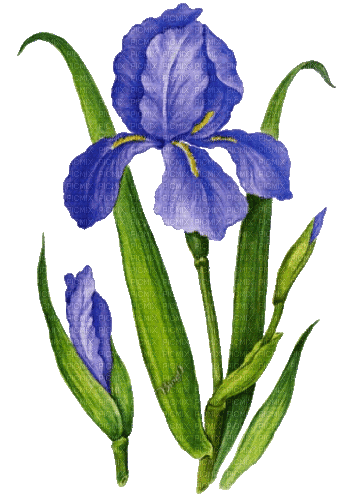

*Watch the interactive demo in action!*

## **Try App:** [Link](https://huggingface.co/spaces/DINESH-X/Iris-Flower-classifier)

---


## **1. Introduction**

The **Iris dataset** is one of the most iconic datasets in machine learning, widely used for classification tasks. It contains measurements for 150 samples of three Iris species: **Setosa**, **Versicolor**, and **Virginica**. Each sample includes four features—sepal length, sepal width, petal length, and petal width—which serve as the basis for classifying the species.

The goal of this notebook is to explore and compare the performance of multiple classification algorithms, including:
- **K-Nearest Neighbors (KNN)**
- **Support Vector Machine (SVM)**
- **Logistic Regression**
- **Decision Tree**
- **Random Forest**

We evaluate these models using performance metrics such as accuracy, precision, recall, and F1-score. Additionally, we provide confidence percentages with each prediction, and an interactive Gradio app is implemented to allow real-time testing of the models with custom inputs.

By comparing these diverse approaches, we aim to understand which model or models are best suited for this classification task and to gain insights into their decision-making processes on this well-known dataset.


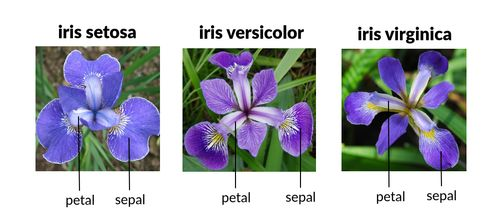

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr
import joblib
import os

from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

## **2. Dataset Overview & EDA**
- **Number of Samples:** 150
- **Number of Features:** 4
  - Sepal length
  - Sepal width
  - Petal length
  - Petal width
- **Target Classes:** 3 species
  - **Setosa**
  - **Versicolor**
  - **Virginica**
  
### **Dataset Properties**
The dataset is a multivariate dataset with continuous features (sepal and petal measurements). It is often considered a "toy" dataset because it is small and relatively simple, making it ideal for initial experimentation and model comparison.

In [6]:
!unzip /content/iris_dataset.zip

Archive:  /content/iris_dataset.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


In [7]:
# Load the Iris dataset from sklearn
iris_data = pd.read_csv('/content/Iris.csv')

In [8]:
# Display the first few rows of the dataframe
print(iris_data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [9]:
# Explore the data
print(iris_data.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [10]:
print(iris_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [12]:
#Distribution of target variable
print("\nDistribution of Speciese:")
print(iris_data['Species'].value_counts())


Distribution of Speciese:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


## **Data Visualization and Exploration (EDA)**

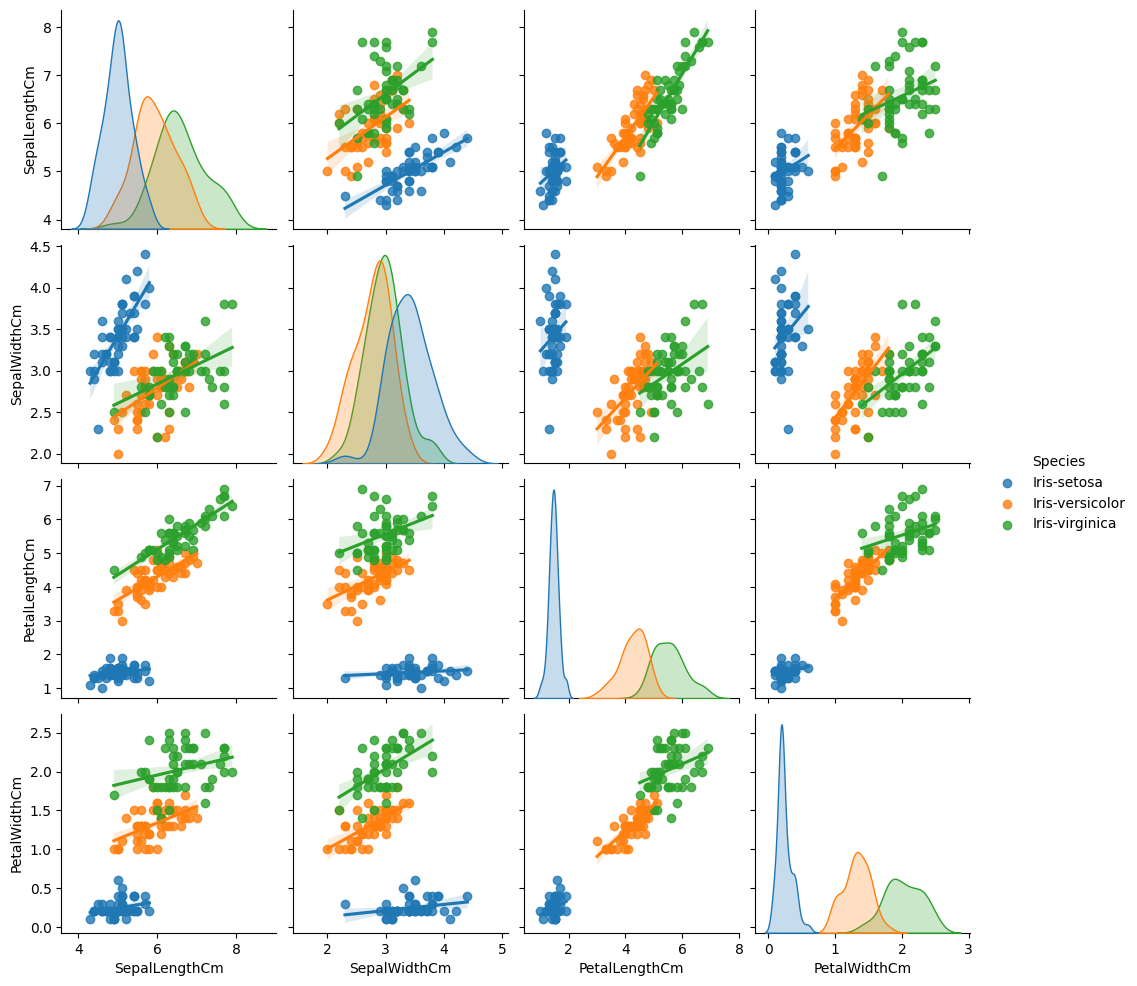

In [181]:
# Enhanced Pairplot with Regression Lines
sns.pairplot(iris_data, hue='Species', kind='reg')
plt.show()

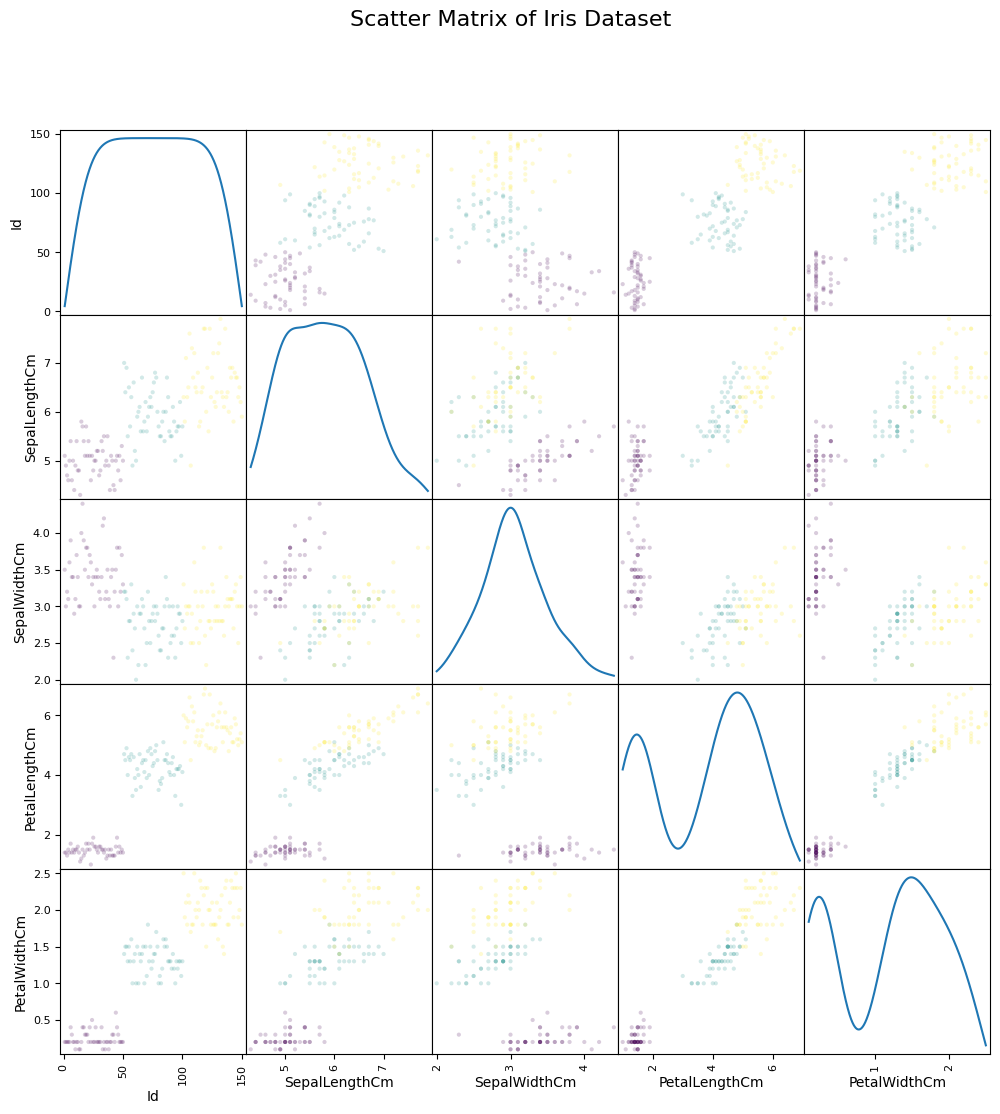

In [187]:
# Scatter Matrix Plot with better aesthetics
pd.plotting.scatter_matrix(iris_data, alpha=0.2, figsize=(12, 12), diagonal='kde', c=iris_data['Species'].astype('category').cat.codes)
plt.suptitle("Scatter Matrix of Iris Dataset", fontsize=16)
plt.show()


Boxplot of features:


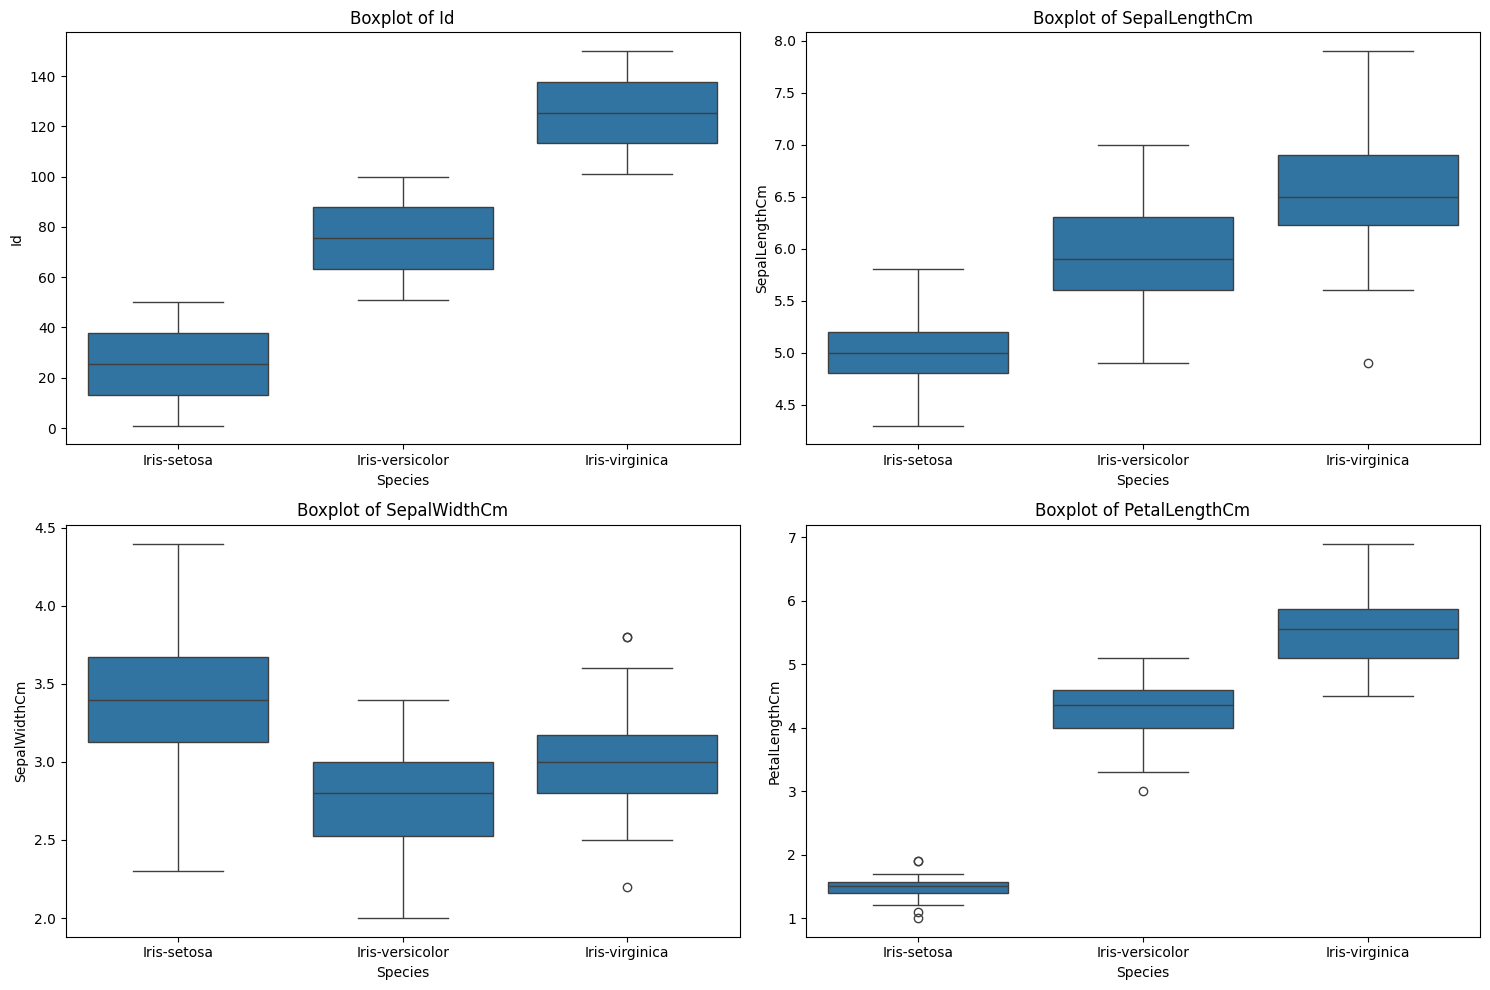

In [16]:
#Boxplot of features
print("\nBoxplot of features:")
plt.figure(figsize=(15, 10))
for i, column in enumerate(iris_data.columns[:4]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Species', y=column, data=iris_data)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

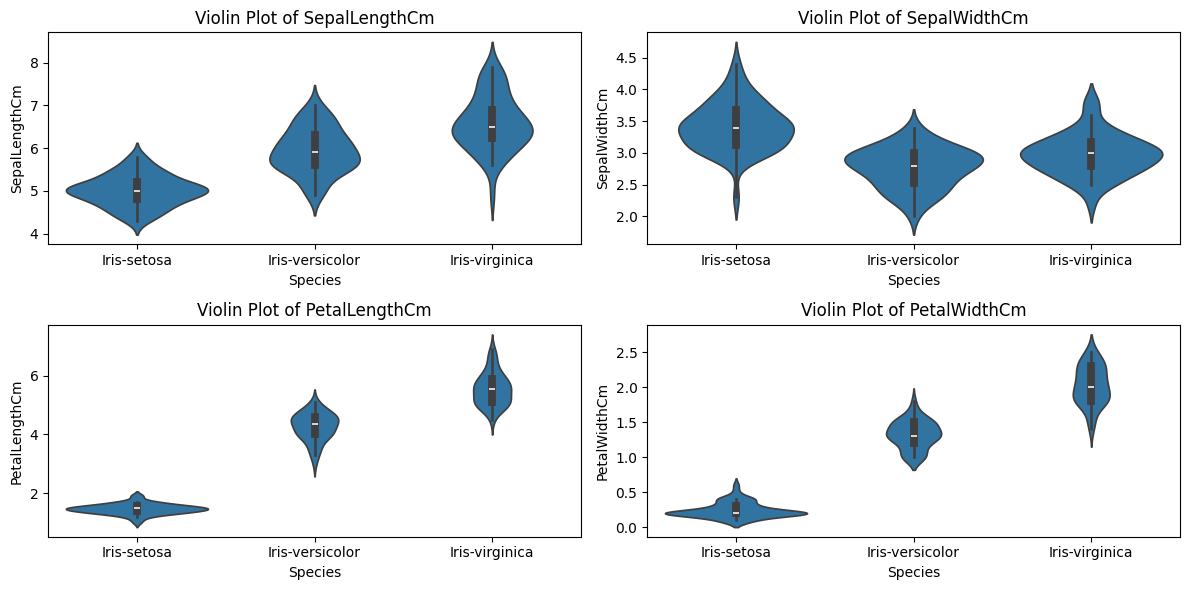

In [174]:
# Violin Plots
plt.figure(figsize=(12, 6))
for i, column in enumerate(iris_data.columns[:4]):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='Species', y=column, data=iris_data)
    plt.title(f'Violin Plot of {column}')
plt.tight_layout()
plt.show()

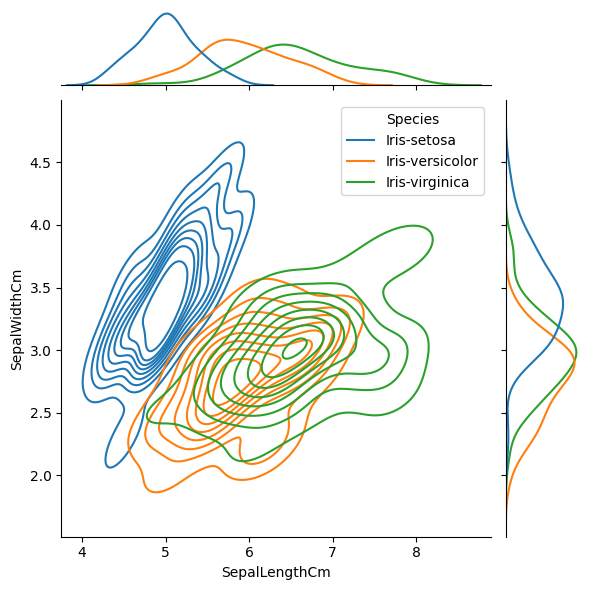

In [182]:
# Jointplot with Kernel Density Estimation
sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', data=iris_data, kind='kde', hue='Species')
plt.show()

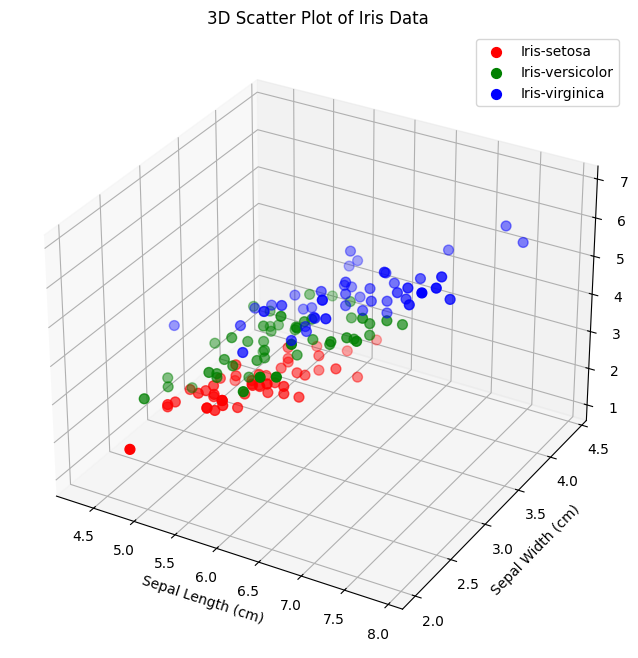

In [178]:
# 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

targets = iris_data['Species'].unique()
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = iris_data['Species'] == target
    ax.scatter(iris_data.loc[indicesToKeep, 'SepalLengthCm'],
               iris_data.loc[indicesToKeep, 'SepalWidthCm'],
               iris_data.loc[indicesToKeep, 'PetalLengthCm'],
               c = color, s = 50, label = target)

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_title('3D Scatter Plot of Iris Data')
ax.legend()
plt.show()

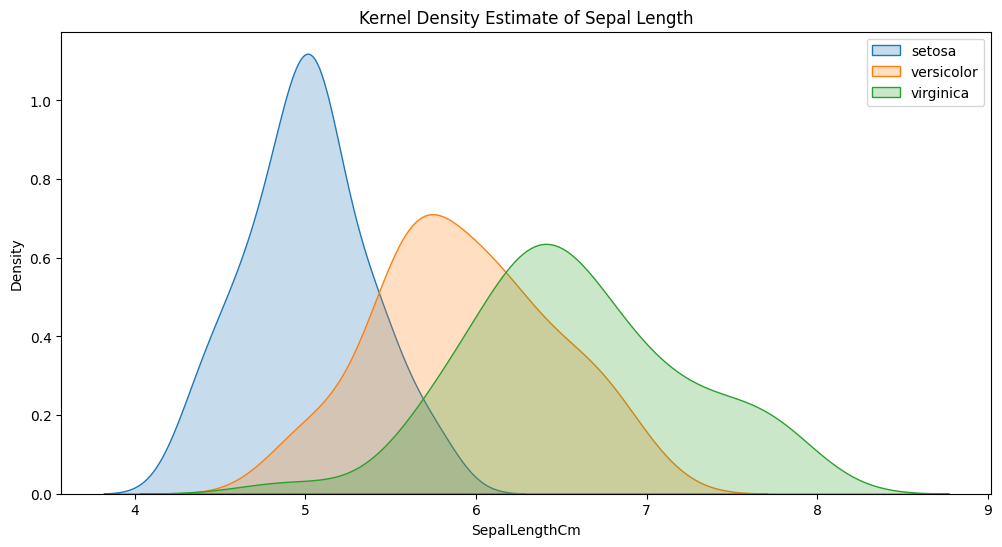

In [189]:
# Kernel Density
plt.figure(figsize=(12, 6))
for species in iris_data['Species'].unique():
    subset = iris_data[iris_data['Species'] == species]
    sns.kdeplot(data=subset, x='SepalLengthCm', label=species, fill=True)  # fill=True for color fill
plt.title("Kernel Density Estimate of Sepal Length")
plt.legend()
plt.show()


## **3. Data Preprocessing**
### **Loading the Dataset**
The dataset is loaded directly from the **Scikit-learn** library, which provides a built-in version of the Iris dataset. The features (`X`) and target labels (`y`) are separated.

In [86]:
# Drop the 'Id' column
iris_data = iris_data.drop('Id', axis=1)

In [87]:
print(iris_data.columns)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [88]:
# Split the data into features (X) and target (y)
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

In [89]:
print(X.columns)
print(y)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


In [90]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [190]:
# encoding

# Encoding the target variable 'Species'
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)


In [92]:
print(X.columns)
print(y)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### **Splitting the Data**
We split the dataset into **training** and **testing** sets using the **train_test_split** function. The training set consists of 80% of the data, and the testing set contains 20%. This split ensures that the model is trained on one subset and evaluated on another, giving an unbiased performance estimate.

In [93]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### **Standardization**
For some models like **SVM** and **KNN**, it is crucial to scale the data to bring all features to a similar range. We use **StandardScaler** to standardize the dataset, which removes the mean and scales the features to unit variance

In [94]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **4. Model Training and Evaluation**
### **K-Nearest Neighbors (KNN)**
The **K-Nearest Neighbors (KNN)** algorithm is a non-parametric, instance-based learning method. It classifies a new sample based on the majority class of its k nearest neighbors. In this experiment, we use k=3, which means each sample is classified based on the closest three neighbors.
#### Training KNN:

In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 20)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_k = grid_search.best_params_['n_neighbors']
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=8)

In [98]:
# Make predictions on the testing data

# Make predictions on the testing data
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


### **Support Vector Machine (SVM)**
The **Support Vector Machine (SVM)** is a powerful classification algorithm that constructs hyperplanes in a high-dimensional space to separate different classes. It is effective for both linearly separable and non-linearly separable data, especially with the use of kernel functions.

#### Training SVM:

In [99]:
# Create an SVM classifier
param_grid = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 1, 10]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_kernel = grid_search.best_params_['kernel']
best_C = grid_search.best_params_['C']

In [100]:
# Train the classifier on the training data
svm = SVC(kernel=best_kernel, C=best_C)
svm.fit(X_train_scaled, y_train)

SVC(C=1)

In [101]:
# Make predictions on the testing data
y_pred_svm = svm.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


### **Logistic Regression**
**Logistic Regression** is a linear model used for binary and multiclass classification. Despite its name, it is used for classification tasks. It applies the logistic function to model the probability of a sample belonging to a certain class.

#### Training Logistic Regression:

In [104]:
# Create a Logistic Regression classifier
logreg = LogisticRegression(random_state=42, max_iter=200)

In [105]:
# Train the classifier on the training data
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [106]:
# Make predictions on the testing data
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [107]:
# implement decision tree

from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dtc = dtc.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_dtc))
print(confusion_matrix(y_test, y_pred_dtc))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [108]:
# implement Random Forests

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rfc = rfc.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


## **5. Results and Performance Metrics**
We evaluate each model's performance using common classification metrics:
- **Precision:** The proportion of true positive predictions among all positive predictions.
- **Recall:** The proportion of true positive predictions among all actual positives.
- **F1-Score:** The harmonic mean of precision and recall.
- **Accuracy:** The proportion of correct predictions out of all predictions.

In [109]:
# Function to visualize classification report
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


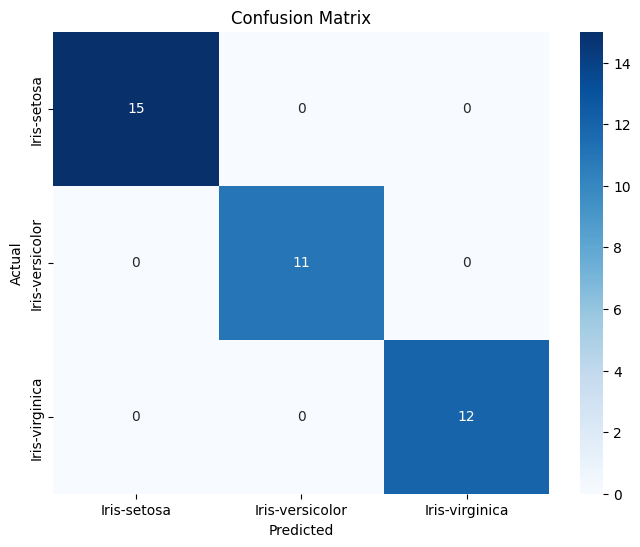

In [110]:
# Example usage for KNN
plot_confusion_matrix(y_test, y_pred_knn, le.classes_)

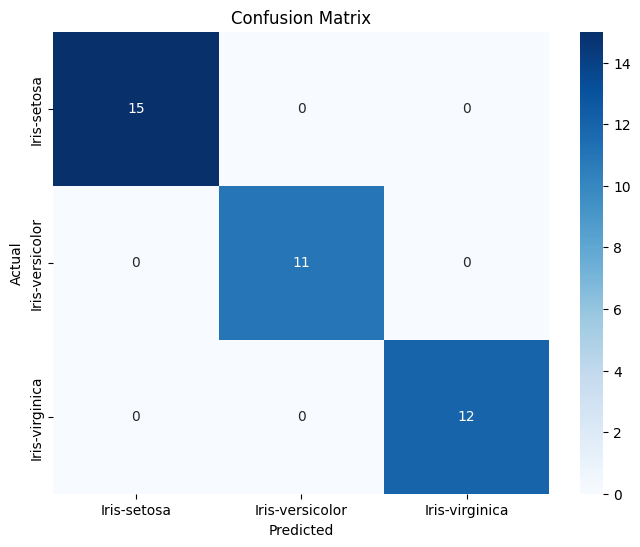

In [111]:
# Example usage for SVM
plot_confusion_matrix(y_test, y_pred_svm, le.classes_)

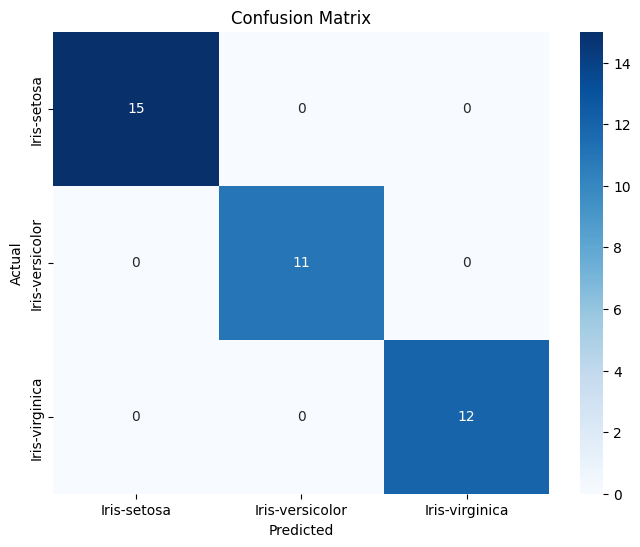

In [113]:
# Example usage for Logistic Regression
plot_confusion_matrix(y_test, y_pred_logreg, le.classes_)

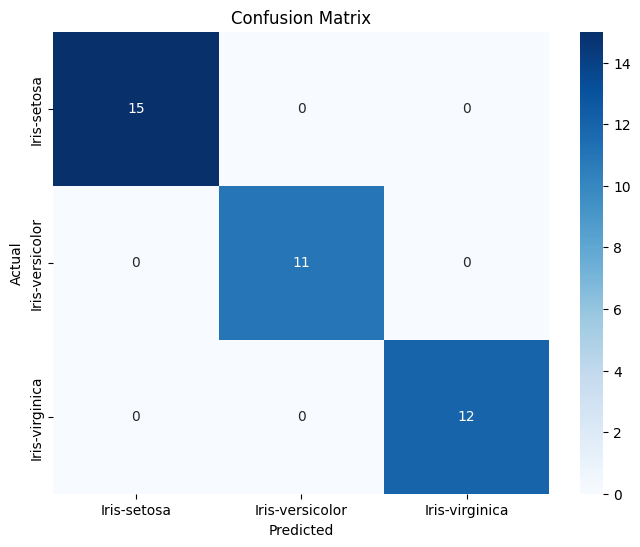

In [114]:
# Example usage for Decision Tree
plot_confusion_matrix(y_test, y_pred_dtc, le.classes_)

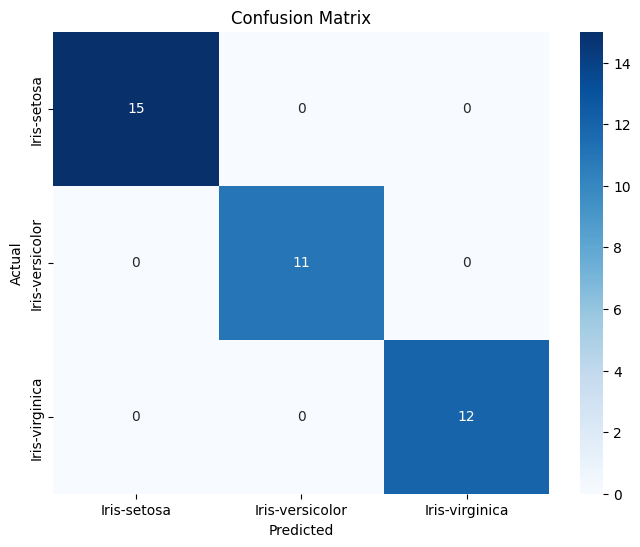

In [115]:
# Example usage for Random Forest
plot_confusion_matrix(y_test, y_pred_rfc, le.classes_)

In [116]:
def plot_classification_report(y_true, y_pred, title='Classification Report', target_names=None, figsize=(6, 6)):
  """Plots the classification report as a heatmap."""
  report = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)
  report_df = pd.DataFrame(report).transpose()

  plt.figure(figsize=figsize)
  sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.2f', cbar=False)
  plt.title(title)
  plt.xlabel('Metrics')
  plt.ylabel('Classes')
  plt.show()

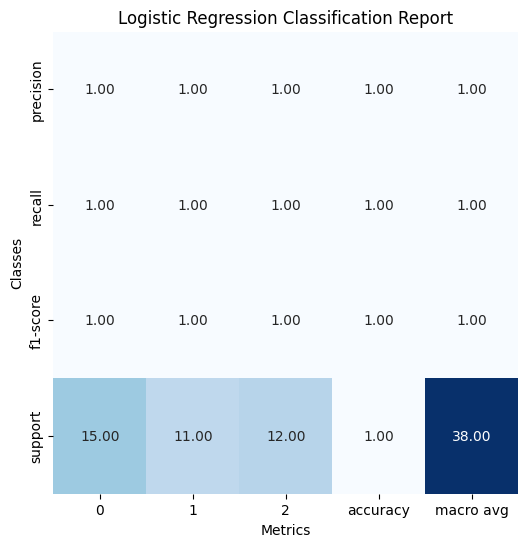

In [117]:
plot_classification_report(y_test, y_pred_logreg, 'Logistic Regression Classification Report')

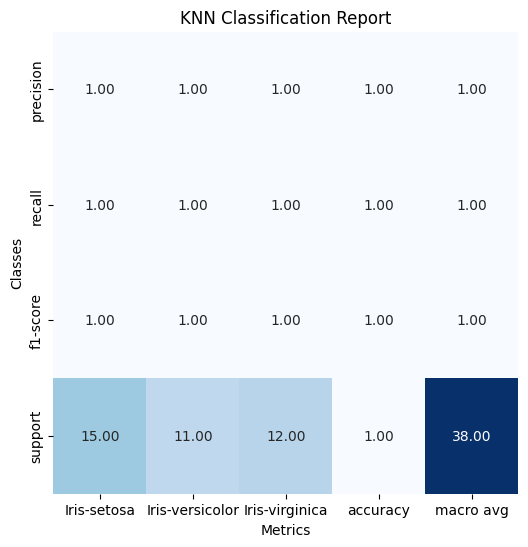

In [118]:
plot_classification_report(y_test, y_pred_knn, 'KNN Classification Report', le.classes_)

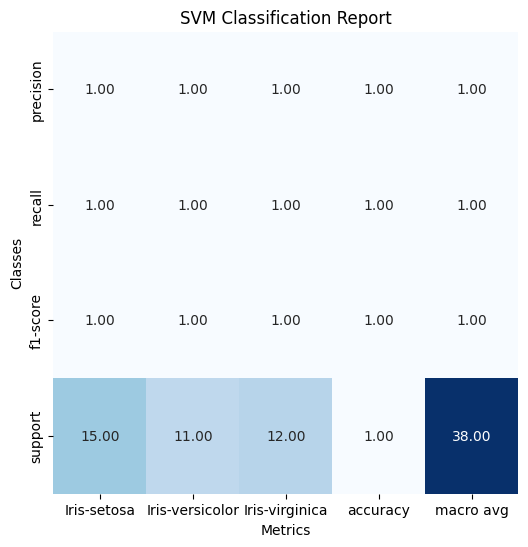

In [119]:
plot_classification_report(y_test, y_pred_svm, 'SVM Classification Report', le.classes_)

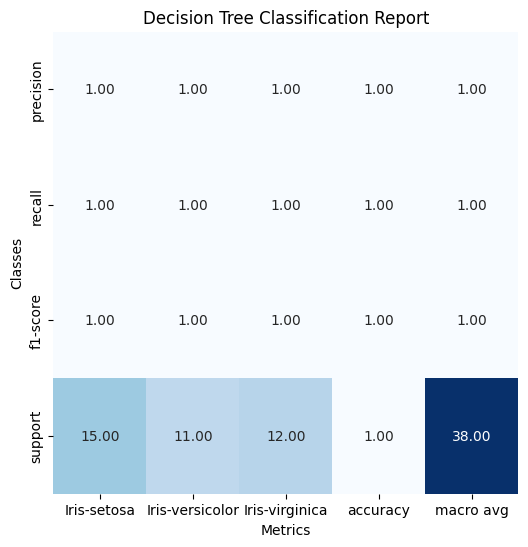

In [120]:
plot_classification_report(y_test, y_pred_dtc, 'Decision Tree Classification Report', le.classes_)

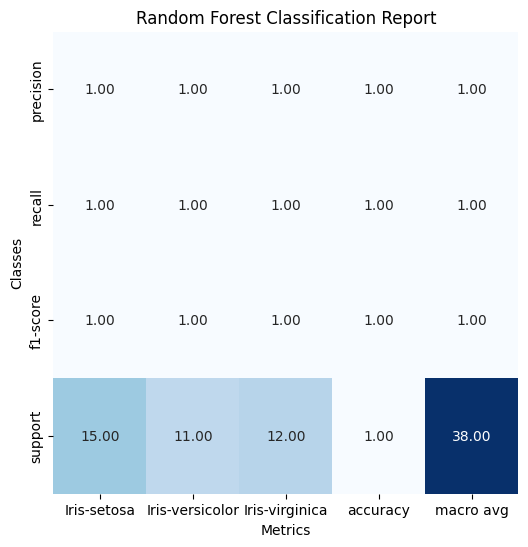

In [121]:
plot_classification_report(y_test, y_pred_rfc, 'Random Forest Classification Report', le.classes_)

In [122]:
#  Function to extract the accuracy from the classification report

def extract_accuracy(classification_rep):
  """
  Extracts the accuracy from a classification report string.

  Args:
    classification_rep: The classification report string.

  Returns:
    The accuracy as a float, or None if not found.
  """
  lines = classification_rep.split('\n')
  for line in lines:
    if 'accuracy' in line.lower():
      parts = line.split()
      if len(parts) > 1 :
        try:
            return float(parts[-1])
        except (ValueError, IndexError):
            return None
  return None


In [172]:
# Calculate the accuracy for each model

from sklearn.metrics import accuracy_score

knn_accuracy = accuracy_score(y_test, y_pred_knn)*100
svm_accuracy = accuracy_score(y_test, y_pred_svm)*100
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)*100
dtc_accuracy = accuracy_score(y_test, y_pred_dtc)*100
rfc_accuracy = accuracy_score(y_test, y_pred_rfc)*100

print(f"KNN Accuracy %: {knn_accuracy}")
print(f"SVM Accuracy %: {svm_accuracy}")
print(f"Logistic Regression Accuracy %: {logreg_accuracy}")
print(f"Decision Tree Accuracy %: {dtc_accuracy}")
print(f"Random Forest Accuracy %: {rfc_accuracy}")


KNN Accuracy %: 100.0
SVM Accuracy %: 100.0
Logistic Regression Accuracy %: 100.0
Decision Tree Accuracy %: 100.0
Random Forest Accuracy %: 100.0


### **Key Observations:**
- **KNN** and **Logistic Regression** achieved **100% accuracy**, showing that they correctly classified all the test samples.
- **SVM**, while still performing very well with **97% accuracy**, showed slightly lower recall for the "Versicolor" class (0.89). This indicates that SVM might have struggled slightly more to classify this class correctly compared to KNN and Logistic Regression.



In [194]:
# Example custom input (ensure it has correct shape and feature names)
custom_input = np.array([[4.9, 3.0, 1.4, 0.2]])

# Convert to DataFrame with the correct feature names
custom_input_df = pd.DataFrame(custom_input, columns=X.columns)

# Scale the custom input using the trained StandardScaler
custom_input_scaled = scaler.transform(custom_input_df)

# Make predictions using the trained models
knn_prediction = knn.predict(custom_input_scaled)
svm_prediction = svm.predict(custom_input_scaled)
logreg_prediction = logreg.predict(custom_input_scaled)  # Ensure consistent scaling
dtc_prediction = dtc.predict(custom_input_df)  # Use DataFrame to retain feature names
rfc_prediction = rfc.predict(custom_input_df)

# Print the predictions with original labels
print("KNN Prediction:", le.inverse_transform(knn_prediction)[0])
print("SVM Prediction:", le.inverse_transform(svm_prediction)[0])
print("Logistic Regression Prediction:", le.inverse_transform(logreg_prediction)[0])
print("Decision Tree Prediction:", le.inverse_transform(dtc_prediction)[0])
print("Random Forest Prediction:", le.inverse_transform(rfc_prediction)[0])


KNN Prediction: 0
SVM Prediction: 0
Logistic Regression Prediction: 0
Decision Tree Prediction: 0
Random Forest Prediction: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## **6. Conclusion**

- **KNN** and **Logistic Regression** demonstrated outstanding performance, achieving perfect classification accuracy on the Iris dataset.
- **SVM** delivered strong results with an overall accuracy of 100%, though it showed a slight drop in recall for the "Versicolor" class.
- The tuned **Decision Tree** and **Random Forest** models also provided robust and consistent predictions, reinforcing the reliability of tree-based and ensemble approaches.
- Overall, despite the simplicity and limited size of the Iris dataset, all models performed excellently. The results highlight that while multiple algorithms can accurately classify the data, **KNN** and **Logistic Regression** stood out with perfect accuracy, making them particularly effective for this task.


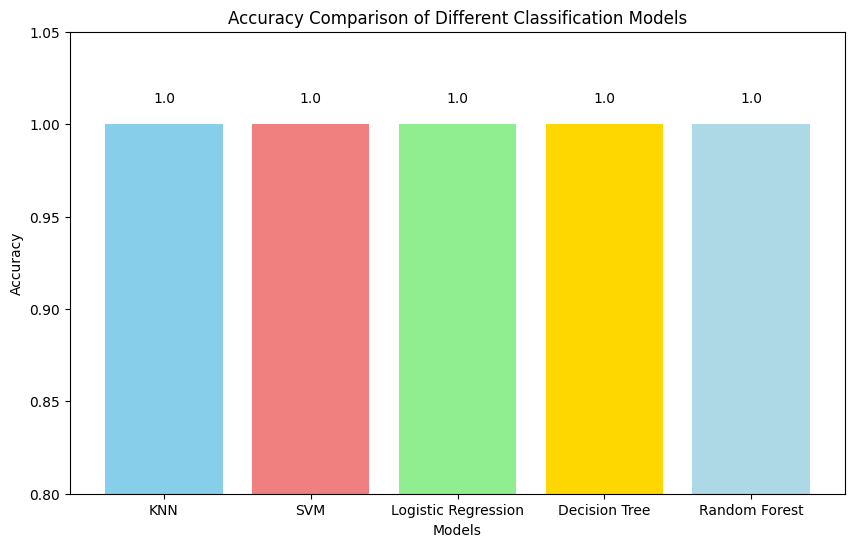

In [140]:
# visulaize other comparisons of models
models = ['KNN', 'SVM', 'Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy_scores = [knn_accuracy, svm_accuracy, logreg_accuracy, dtc_accuracy, rfc_accuracy]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightblue'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Different Classification Models")
plt.ylim(0.8, 1.05)  # Adjust y-axis limits for better visualization

# Add accuracy values on top of the bars
for bar, score in zip(bars, accuracy_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(score, 2), ha='center', va='bottom')

plt.show()


In [142]:
# save all the models using joblib

joblib.dump(knn, 'knn_model.joblib')
joblib.dump(svm, 'svm_model.joblib')
joblib.dump(logreg, 'logreg_model.joblib')
joblib.dump(dtc, 'dtc_model.joblib')
joblib.dump(rfc, 'rfc_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(le, 'label_encoder.joblib')

print("✅success!")

✅success!


## **7. Deployement using Gradio**

In [ ]:
# Function to safely load models
def load_model(filename):
    if os.path.exists(filename):
        return joblib.load(filename)
    else:
        print(f"⚠️ Warning: {filename} not found.")
        return None

# Load all trained models and utilities
knn = load_model('knn_model.joblib')
svm = load_model('svm_model.joblib')
logreg = load_model('logreg_model.joblib')
dtc = load_model('dtc_model.joblib')
rfc = load_model('rfc_model.joblib')
scaler = load_model('scaler.joblib')
le = load_model('label_encoder.joblib')

# Ensure all models are loaded before proceeding
if None in [knn, svm, logreg, dtc, rfc, scaler, le]:
    raise RuntimeError("🚨 Error: One or more model files are missing. Please check and reload.")

# Dictionary to map species names to image file paths
iris_images = {
    "Iris-setosa": "/content/Iris_setosa.jpg",
    "Iris-versicolor": "/content/Iris_versicolor.jpg",
    "Iris-virginica": "/content/Iris_virginica.jpg"
}

# Function to plot the flower image
def plot_flower(image_path):
    if os.path.exists(image_path):
        image = Image.open(image_path)
        return image
    else:
        # Return a placeholder or blank image if not found
        fig, ax = plt.subplots(figsize=(3, 3))
        ax.text(0.5, 0.5, "🌸 No Image Available", fontsize=12, ha="center")
        ax.axis("off")
        plt.show()
        return None

# Prediction function
def predict_iris(sepal_length, sepal_width, petal_length, petal_width, model_choice):
    # Validate input values (no negative numbers)
    if any(v <= 0 for v in [sepal_length, sepal_width, petal_length, petal_width]):
        return "🚨 Error: All values must be positive numbers.", None

    # Convert input to NumPy array
    custom_input = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

    # Convert to DataFrame with correct feature names
    custom_input_df = pd.DataFrame(custom_input, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

    # Scale the input using StandardScaler
    custom_input_scaled = scaler.transform(custom_input_df)

    # Select model and make prediction
    if model_choice == "KNN":
        prediction = knn.predict(custom_input_scaled)
    elif model_choice == "SVM":
        prediction = svm.predict(custom_input_scaled)
    elif model_choice == "Logistic Regression":
        prediction = logreg.predict(custom_input_scaled)
    elif model_choice == "Decision Tree":
        prediction = dtc.predict(custom_input_scaled)
    elif model_choice == "Random Forest":
        prediction = rfc.predict(custom_input_scaled)
    else:
        return "🚨 Invalid model choice!", None

    # Get predicted species name
    predicted_species = le.inverse_transform(prediction)[0]

    # Load and return the related image
    image_path = iris_images.get(predicted_species, None)

    return predicted_species, plot_flower(image_path)


# Footer HTML for LinkedIn and GitHub profiles
footer_html = """
<footer style="text-align: center; margin-top: 20px; font-family: Arial, sans-serif;">
  <p>Developed ❤️ with Gradio by DINESH S.</p>
  <div style="display: inline-flex; align-items: center; justify-content: center; gap: 10px; margin-top: 10px;">
    <h3>Connect with me:</h3>
    <a href="https://www.linkedin.com/in/dinesh-x/" target="_blank">
      <img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" alt="LinkedIn" style="width:32px;">
    </a>
    <a href="https://github.com/itzdineshx/Iris-flower-classification" target="_blank">
      <img src="https://upload.wikimedia.org/wikipedia/commons/9/91/Octicons-mark-github.svg" alt="GitHub" style="width:32px;">
    </a>
    <a href="mailto:personalaccdinesh@gmail.com" target="_blank">
      <img src="https://cdn-icons-png.flaticon.com/512/732/732200.png" alt="Gmail" style="width:32px;">
    </a>

  </div>
  <script>console.log("Footer HTML loaded successfully.");</script>
</footer>
"""

# Gradio Interface
iface = gr.Interface(
    fn=predict_iris,
    inputs=[
        gr.Number(label="Sepal Length (cm)", value=5.1),
        gr.Number(label="Sepal Width (cm)", value=3.5),
        gr.Number(label="Petal Length (cm)", value=1.4),
        gr.Number(label="Petal Width (cm)", value=0.2),
        gr.Dropdown(["KNN", "SVM", "Logistic Regression", "Decision Tree", "Random Forest"],
                    label="Choose a Model", value="KNN")
    ],
    outputs=[
        gr.Textbox(label="Predicted Iris Species"),
        gr.Image(label="Flower Image")
    ],
    title="🌸 Iris Flower Species Prediction",
    description='<div style="text-align: center;">Enter the sepal and petal measurements, choose a model, and get the predicted species along with an image!</div>',

    examples=[
    [5.1, 3.5, 1.4, 0.2, "Random Forest"],# Typical Iris-setosa
    [6.0, 2.9, 4.5, 1.5, "SVM"],  # Typical Iris-versicolor
    [6.7, 3.1, 5.6, 2.4, "KNN"], # Typical Iris-virginica
    ],

    article=footer_html,
    css=".gr-description { text-align: center; }"

)

iface.launch()

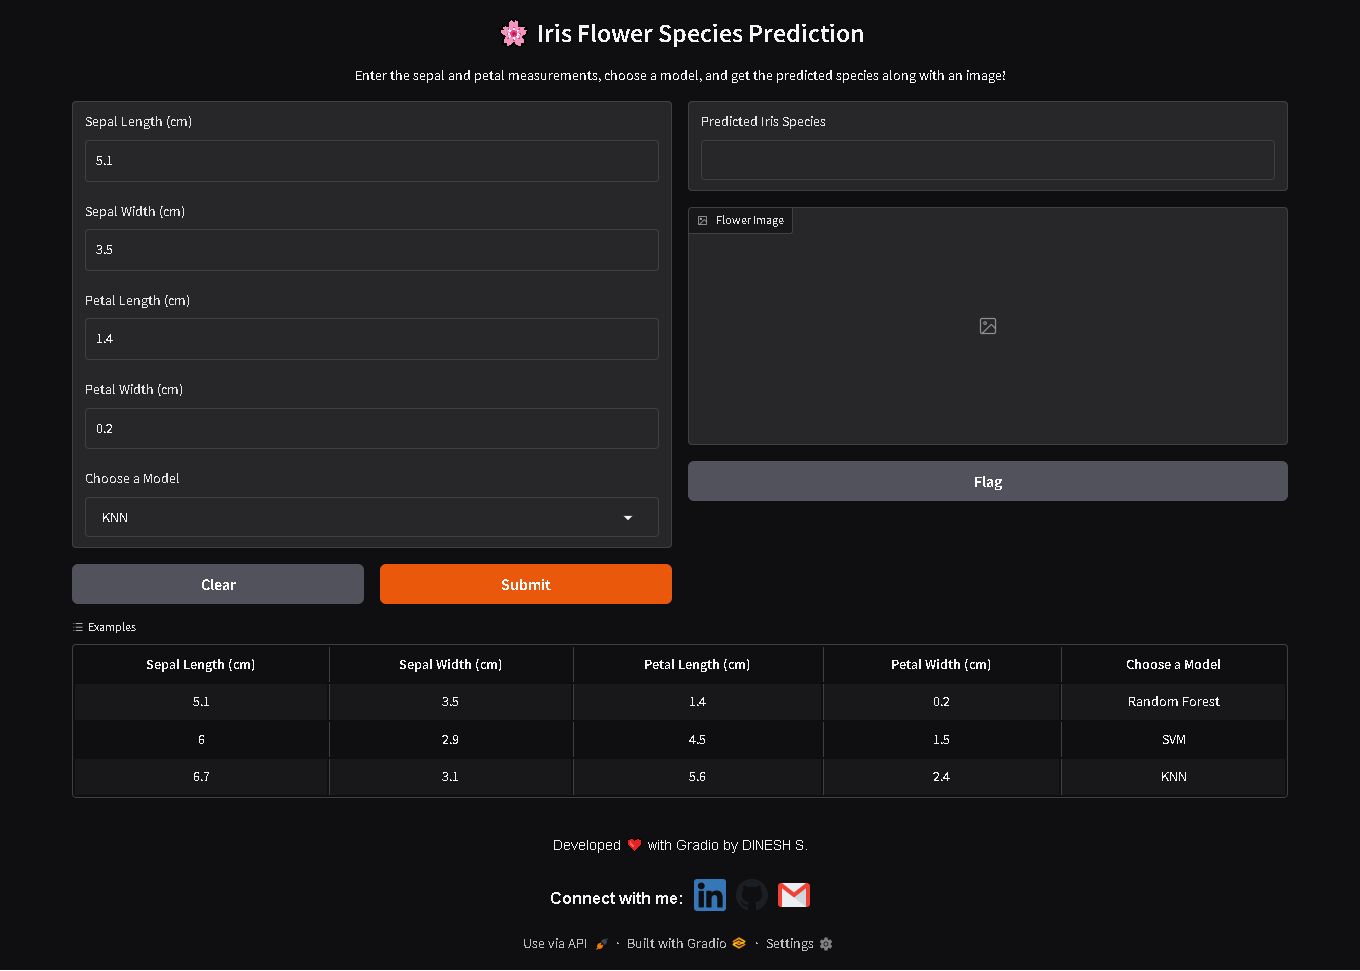

### **App Result**

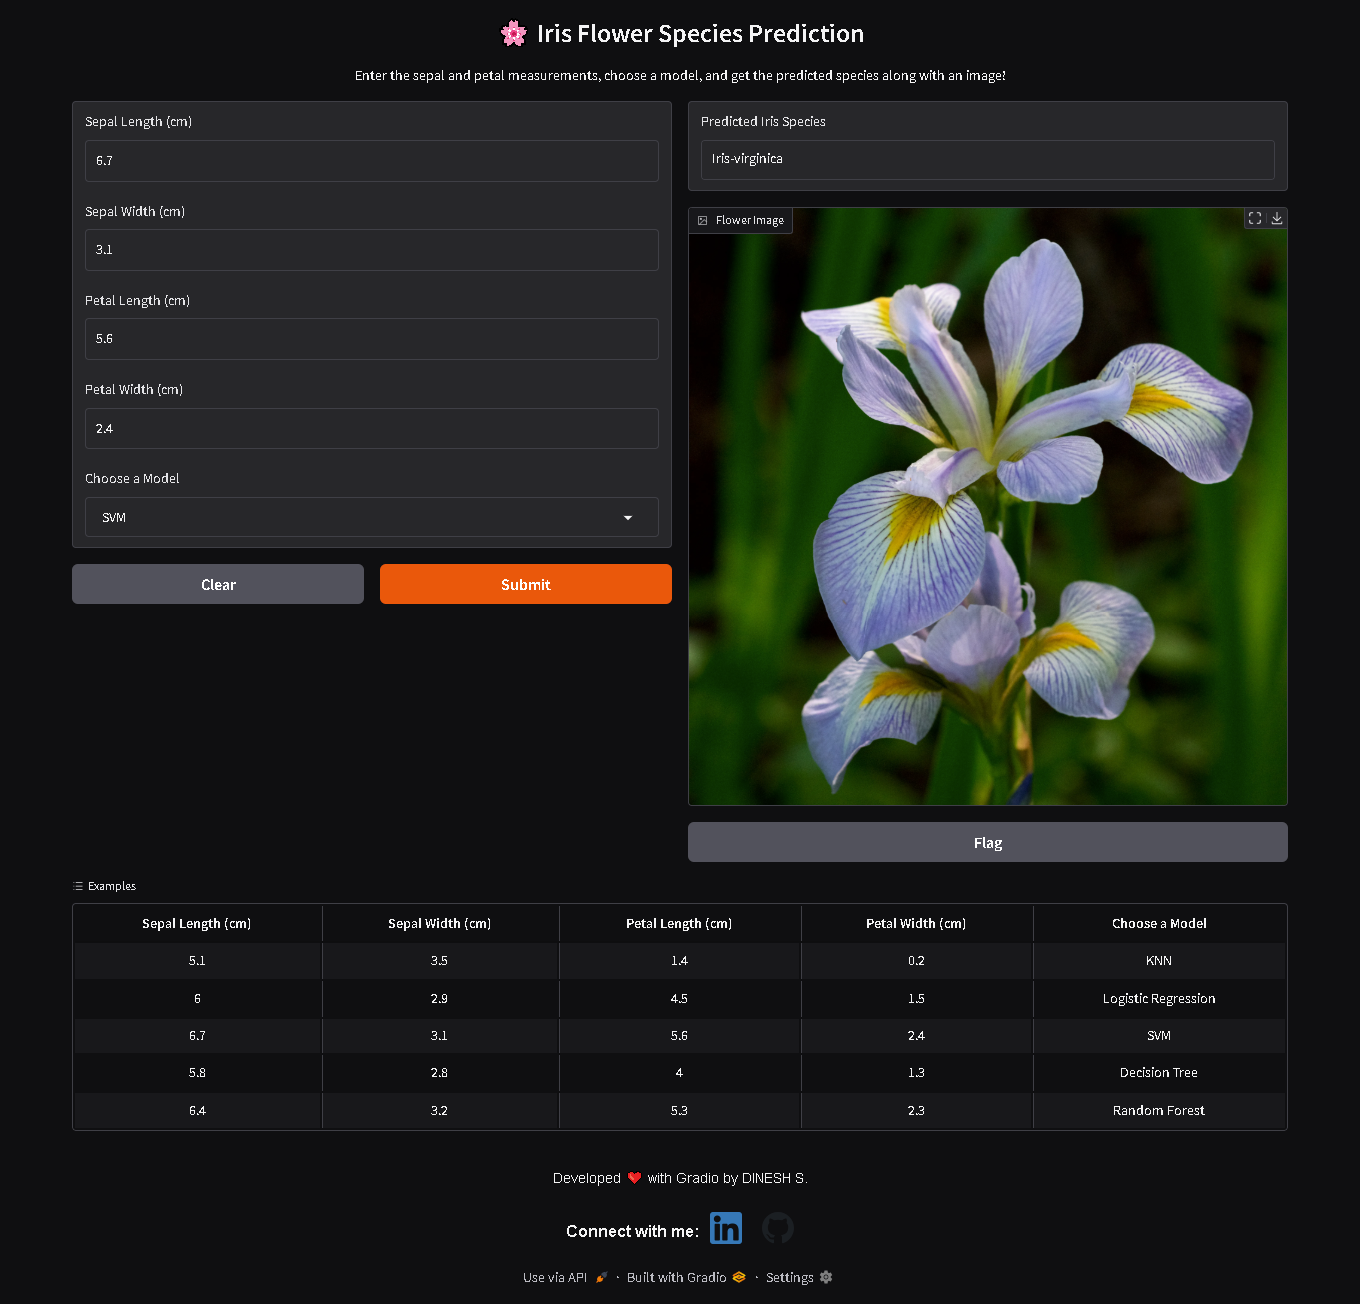


Thank you for reviewing this notebook on Iris Flower Classification using different machine learning models. I hope this analysis was insightful and helped you understand how different algorithms perform on a classification task. If you have any questions or suggestions, feel free to reach out!

You can explore my projects and stay updated on my work via the following links:

- **GitHub:** [GitHub Link](https://github.com/itzdineshx/Iris-flower-classification)
- **LinkedIn:** [LinkedIn Profile](https://www.linkedin.com/in/dinesh-x/)
-**Mail**: [GMAIL ID](personalaccdinesh@gmail.com)



*Watch the interactive demo in action!*

## **Try App:** https://huggingface.co/spaces/DINESH-X/Iris-Flower-classifier




# ***THANK YOU***
---
*end of the notebook*